# 3.16. Árbol de regresión Kilos Lana - Dataset 2

Vamos a utilizar un árbol de regresión para predecir la cantidad de kilos lana que se obtendrá de un rebaño de ovejas en función de diversas variables independientes. 

## Librerías

Primero comenzaremos importando las librerías necesarias. Para el tratamiento de los datos utilizaremos NumPy y Pandas, dos de las bibliotecas más importantes para el análisis de datos en Python. También usaremos Matplotlib para la creación de gráficos y visualizaciones. Para el modelado, implementaremos un árbol de regresión con la ayuda de Scikit-Learn, una biblioteca de aprendizaje automático de código abierto en Python. Utilizaremos DecisionTreeRegressor para construir el modelo y plot_tree para visualizarlo. Además, usaremos export_text para imprimir la regla de decisión del árbol en un formato fácil de leer. Para optimizar el modelo, utilizaremos GridSearchCV, una herramienta de Scikit-Learn que nos permitirá encontrar los mejores parámetros para el árbol de regresión. Por último, utilizaremos varias métricas de evaluación como mean_squared_error, r2_score, explained_variance_score y mean_absolute_error para evaluar el rendimiento del modelo y hacer mejoras en su precisión. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

## Datos

Para nuestro análisis, utilizaremos el dataset 2, el cual contiene información sobre la producción y las condiciones climáticas anuales de los departamentos de Chubut, así como del campo El Mirabueno. El objetivo es ajustar un modelo de regresión que nos permita predecir la cantidad de Lana en función de las variables disponibles en el conjunto de datos.

In [2]:
datos = pd.read_csv("../datos_analisis/dataset_produccion_clima_chubut_mirabueno.csv")
datos.head(3)

,fecha,hectareas,departamento,carneros,ovejas,borregos,capones,cordero/as,total_ovinos,kilos_lana,finura,rinde,humedad,cant_lluvia,tem_max,temp_media,temp_min
0,2012-12-31,1294000,BIEDMA,5785,93378,30168,48447,16071,193849,649130.0,19.8,58.06,58.4,46.4,18.1,12.4,6.7
1,2013-12-31,1294000,BIEDMA,5376,82998,25341,47350,26832,187897,620176.0,19.6,56.68,64.7,226.5,19.9,14.2,8.8
2,2014-12-31,1294000,BIEDMA,4785,82706,29379,35155,29900,181925,649130.0,20.1,61.19,60.5,331.3,20.6,14.7,9.2


## Entrenaminto del modelo

La clase DecisionTreeRegressor del módulo sklearn.tree permite entrenar árboles de decisión para problemas de regresión. A continuación, se ajusta un árbol de regresión empleando como variable respuesta **kilos_lana** y como predictores **cant_lluvia**, **total_ovinos** y **temp_media**.

Como en todo estudio de regresión, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer la posterior evaluación, se lleva a cabo la división del conjunto de datos en dos grupos: uno para entrenamiento y otro para testeo. Se seleccionan como variables predictoras (X_data) las variables "cant_lluvia", "total_ovinos" y "temp_media", mientras que la variable respuesta (y_data) es "kilos_lana". La división en dos conjuntos se realiza mediante la función "train_test_split" del módulo "sklearn.model_selection", la cual permite seleccionar el tamaño del conjunto de testeo mediante el argumento "test_size" y fijar la semilla aleatoria con "random_state".

In [3]:
X_data = datos[['cant_lluvia','total_ovinos','temp_media']]
y_data = datos[['kilos_lana']]
X_train, X_test, y_train, y_test = train_test_split(
                                        X_data,
                                        y_data,
                                        random_state = 123
                                    )

Luego, se crea el objeto "modelo" correspondiente a un árbol de regresión de profundidad máxima igual a 3 y con semilla aleatoria fija en 123. La profundidad máxima indica la máxima cantidad de divisiones que se permiten en el árbol, mientras que la semilla aleatoria asegura que el modelo sea reproducible.

In [4]:
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123
          )

Por último, se entrena el modelo con los datos de entrenamiento mediante la función "fit" del objeto "modelo". Esta función ajusta el árbol de regresión utilizando las variables predictoras y la variable respuesta del conjunto de entrenamiento, de manera que pueda predecir nuevos valores de la variable respuesta en base a los valores de las variables predictoras.

In [5]:
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Una vez entrenado el árbol, se puede representar mediante la combinación de las funciones plot_tree() y export_text(). La función plot_tree() dibuja la estructura del árbol y muestra el número de observaciones y valor medio de la variable respuesta en cada nodo. La función export_text() representa esta misma información en formato texto.

Las siguientes líneas de código imprimen la profundidad del árbol de regresión y el número de nodos terminales del mismo, respectivamente. La profundidad del árbol se refiere a la longitud del camino más largo desde la raíz del árbol hasta una hoja, es decir, el número máximo de divisiones que se realizaron para obtener las hojas. Por su parte, el número de nodos terminales se refiere a la cantidad de hojas en el árbol, es decir, la cantidad de nodos finales que se obtienen después de realizar las divisiones. Estas métricas son útiles para evaluar la complejidad del árbol y la cantidad de información que se está considerando para hacer las predicciones.

In [6]:
'Profundidad del árbol: {:.0f}'.format(modelo.get_depth())

'Profundidad del árbol: 3'

In [7]:
'Número de nodos terminales: {:.0f}'.format(modelo.get_n_leaves())

'Número de nodos terminales: 8'

La siguiente celda genera una visualización del árbol de regresión que se ha creado mediante la clase DecisionTreeRegressor. La función plot_tree() se encarga de generar un diagrama del árbol con nodos y hojas etiquetados con las variables que se utilizaron para crear el modelo y los valores de división de cada nodo.

El argumento `decision_tree` especifica el modelo que se desea visualizar, mientras que `feature_names` y `class_names` son las etiquetas que se le asignan a las variables predictoras y a la variable respuesta, respectivamente. Los parámetros adicionales, como `filled`, `impurity`, `fontsize` y `precision`, permiten personalizar la apariencia de la visualización.

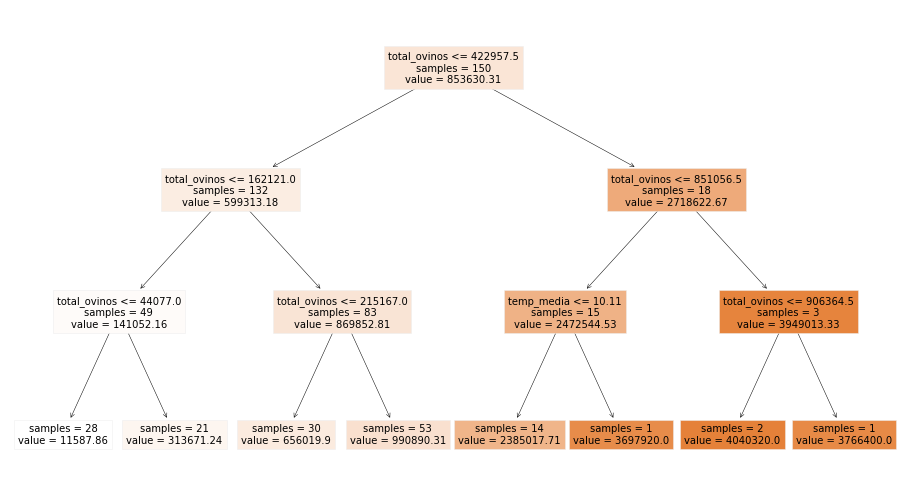

In [37]:
fig, ax = plt.subplots()
plot = plot_tree(
            decision_tree = modelo,
            feature_names = X_data.columns,
            class_names   = 'kilos_lana',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

El primer nodo del árbol evalúa la condición en la variable "total_ovinos". Para las muestras que llegan a este nodo, el valor de "total_ovinos" es menor o igual a 422957.50. Se observa que 150 muestras cumplen con esta condición y que el valor promedio de la variable objetivo "kilos_lana" para estas muestras es de 853630.31.

Siguiendo la rama izquierda del árbol, el siguiente nodo indica que si el valor de "total_ovinos" es menor o igual a 162121, entonces la predicción para la variable respuesta "kilos_lana" es de 599313.18. Este nodo contiene 132 muestras que cumplen con esta condición.

El nodo siguiente a la izquierda contiene 49 muestras que también cumplen con esta condición, lo que significa que hay 49 observaciones con "total_ovinos" menor o igual a 44077. La predicción para estas 49 observaciones es de 141052.16 kilos de lana.

Este nodo finaliza en dos hojas, lo que significa que no se pueden realizar más divisiones. El número de muestras en una de las hojas es de 28, lo que indica la cantidad de registros en el conjunto de datos de entrenamiento que cumplen las condiciones para llegar a esa hoja. El valor promedio de la variable objetivo "kilos_lana" para las muestras en esta hoja es de 11587.86 kilos de lana.

Se observa que en un solo nodo se utiliza la temperatura media como condición.

El número de muestras en la otra hoja es de 21, lo que indica la cantidad de registros en el conjunto de datos de entrenamiento que cumplen las condiciones para llegar a esa hoja. El valor promedio de la variable objetivo "kilos_lana" para las muestras en esta hoja es de 313671.24 kilos de lana.

En resumen, este árbol de regresión lineal utiliza la variable "total_ovinos" para hacer predicciones sobre la producción de lana en función de las condiciones meteorológicas y la cantidad de ovinos. Se observa una reducción en la cantidad de muestras a medida que se profundiza en el árbol, lo que indica que las divisiones posteriores se basan en un número menor de observaciones. Además, los valores promedio de la variable objetivo varían en función de las condiciones de las muestras en cada hoja.

La función `export_text` permite exportar la estructura del árbol de regresión en formato de texto e imprimirlo. En este caso, muestra información acerca de la estructura del árbol de decisión, incluyendo la regla de decisión utilizada para cada nodo. El argumento `decision_tree` especifica el modelo a exportar y `feature_names` se utiliza para nombrar las variables predictoras en el texto.

In [9]:
print(export_text(decision_tree=modelo, feature_names=list(X_data.columns)))

|--- total_ovinos <= 422957.50
|   |--- total_ovinos <= 162121.00
|   |   |--- total_ovinos <= 44077.00
|   |   |   |--- value: [11587.86]
|   |   |--- total_ovinos >  44077.00
|   |   |   |--- value: [313671.24]
|   |--- total_ovinos >  162121.00
|   |   |--- total_ovinos <= 215167.00
|   |   |   |--- value: [656019.90]
|   |   |--- total_ovinos >  215167.00
|   |   |   |--- value: [990890.31]
|--- total_ovinos >  422957.50
|   |--- total_ovinos <= 851056.50
|   |   |--- temp_media <= 10.11
|   |   |   |--- value: [2385017.71]
|   |   |--- temp_media >  10.11
|   |   |   |--- value: [3697920.00]
|   |--- total_ovinos >  851056.50
|   |   |--- total_ovinos <= 906364.50
|   |   |   |--- value: [4040320.00]
|   |   |--- total_ovinos >  906364.50
|   |   |   |--- value: [3766400.00]



Siguiendo la segunda rama del árbol, se observa que el valor de la lana estará determinado por la satisfacción de las siguientes condiciones:
- total_ovinos > 422957.50
- total_ovinos <= 851056.50
- temp_media <= 10.11

En caso de cumplirse dichas condiciones, se espera obtener un valor de 2385017.71 kilogramos de lana.

## Importancia de predictores

La importancia de cada predictor en un modelo se calcula en base a la reducción total que logra en el criterio de división en todas las divisiones en las que participa. Si un predictor no se utiliza en ninguna división, no se incluye en el modelo y su importancia es 0. Esto te permite saber cuáles son los predictores más importantes en la creación del modelo y cuáles tienen poco o ningún impacto en la predicción.

El siguiente código crea un DataFrame `importancia_predictores` que contiene dos columnas: `predictor`, que contiene los nombres de las variables predictoras, y `importancia`, que contiene la importancia de cada variable en el modelo de árbol de regresión ajustado. La importancia de cada variable se calcula a partir del criterio de ganancia de información y mide cuánto contribuye cada variable en la reducción de la variabilidad de la variable respuesta (en este caso, `kilos_lana`).

Luego, el DataFrame `importancia_predictores` se ordena en orden descendente de importancia de los predictores, de manera que la variable más importante aparece en primer lugar.

In [10]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_data.columns,
                             'importancia': modelo.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia
1,total_ovinos,0.983561
2,temp_media,0.016439
0,cant_lluvia,0.000000


El predictor "total_ovinos" resultó ser el más importante en el modelo, con un valor de importancia de 0.98, lo que indica que su presencia en las divisiones del árbol tiene un gran impacto. En segundo lugar, se encuentra el predictor "temp_media", con una importancia de 0.02. Finalmente, el predictor "cant_lluvia" no aportó nada al modelo, dado que su valor de importancia fue 0, lo que sugiere que no se incluyó en ninguna división del árbol.

## Podado del árbol (pruning)

Con la finalidad de reducir la varianza del modelo y así mejorar la capacidad predictiva, se somete al árbol a un proceso de pruning. Para aplicar el proceso de pruning es necesario indicar el argumento ccp_alpha que determina el grado de penalización por complejidad. Cuanto mayor es este valor, más agresivo el podado y menor el tamaño del árbol resultante.

La siguiente celda realiza una búsqueda por validación cruzada para encontrar el valor óptimo del parámetro ccp_alpha que permita realizar el pruning del árbol. Para ello, se evalúan diferentes valores de ccp_alpha en un grid especificado en param_grid.

Se define un diccionario llamado param_grid que contiene una única clave 'ccp_alpha' con valores que van de 0 a 80, separados en 20 partes iguales. Este diccionario se utiliza posteriormente en una búsqueda de hiperparámetros utilizando la clase GridSearchCV para para realizar la búsqueda por validación cruzada y encontrar el mejor valor de ccp_alpha en el modelo de Árbol de Decisión.

Se especifica el modelo de árbol de regresión a utilizar, que se crea con la máxima profundidad posible y sin restricciones en el número mínimo de muestras por nodo para permitir su posterior poda.

El parámetro cv indica el número de particiones a utilizar (DecisionTreeRegressor) en la validación cruzada, en este caso se utiliza un valor de 10. El parámetro refit se establece en True para refinar el modelo final con todos los datos de entrenamiento después de encontrar el valor óptimo de ccp_alpha. Finalmente, return_train_score se establece en True para que se devuelvan también los resultados de la evaluación en el conjunto de entrenamiento.

In [11]:
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

grid = GridSearchCV(
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'ccp_alpha': array([ 0.        ,  4.21052632,  8.42105263, 12.63157895, 16.84210526,
       21.05263158, 25.26315789, 29.47368421, 33.68421053, 37.89473684,
       42.10526316, 46.31578947, 50.52631579, 54.73684211, 58.94736842,
       63.15789474, 67.36842105, 71.57894737, 75.78947368, 80.        ])},
             return_train_score=True)

El código grid.best_params_ muestra el valor óptimo encontrado para el hiperparámetro ccp_alpha durante la búsqueda por validación cruzada realizada en la celda anterior. Esta es la combinación de hiperparámetros que resultó en el mejor desempeño del modelo según el criterio de la búsqueda.

In [12]:
grid.best_params_

{'ccp_alpha': 0.0}

El resultado de `grid.best_params_` indica que el mejor valor de hiperparámetro encontrado en la búsqueda por validación cruzada es `ccp_alpha=0.0`. Esto significa que no se debe realizar pruning por complejidad constante, ya que el mejor resultado se obtiene con el árbol no podado. La complejidad constante pruning (CCP) es una técnica que se utiliza para evitar el sobreajuste de los árboles de decisión, reduciendo su complejidad al eliminar las ramas que aportan poco a la precisión de las predicciones. Si `ccp_alpha` fuera mayor que cero, entonces se estaría aplicando un criterio para cortar ramas innecesarias del árbol. En este caso, como el valor de `ccp_alpha` óptimo encontrado es cero, el árbol creado no requiere poda alguna.

Una vez identificado el valor óptimo de ccp_alpha, se reentrena el árbol indicando este valor en sus argumentos.

El siguiente código crea una instancia del modelo de árbol de decisión con el mejor valor de ccp_alpha encontrado a través de la búsqueda por validación cruzada. Luego se imprimen la profundidad del árbol y el número de nodos terminales del modelo final ajustado.

In [13]:
modelo_final = grid.best_estimator_
'Profundidad del árbol: {:.0f}'.format(modelo_final.get_depth())

'Profundidad del árbol: 16'

In [14]:
'Número de nodos terminales: {:.0f}'.format(modelo_final.get_n_leaves())

'Número de nodos terminales: 135'

La siguiente celda grafica la estructura del árbol final resultante del proceso de entrenamiento y validación. En particular, se utiliza la función `plot_tree` para generar un diagrama de árbol que muestra las diferentes ramas y nodos que componen el modelo final. Se especifican también algunos parámetros para el formato del gráfico, como el tamaño (`figsize`) y la opción de colorear los nodos según la variable respuesta (`filled`). Además, se especifica el nombre de las variables predictivas (`feature_names`) y el nombre de la variable respuesta (`class_names`).

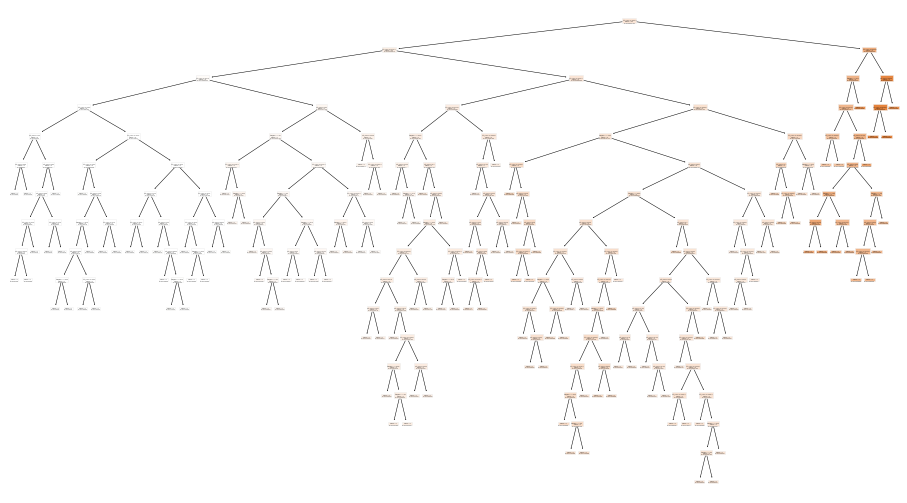

In [38]:
fig, ax = plt.subplots()
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = X_data.columns,
            class_names   = 'kilos_lana"',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

El gráfico es difícil de interpretar debido a la gran profundidad del árbol, lo que hace que los nodos estén demasiado comprimidos y no se puedan apreciar correctamente. Para obtener una visualización más clara de la estructura del árbol de decisión, se puede exportar como texto. Esto proporcionará una lista detallada de los nodos del árbol, incluyendo las variables y los valores de corte utilizados en cada división, así como el número de muestras y el valor de la variable objetivo en cada nodo terminal o hoja. De esta manera, se podrá entender de manera más clara cómo el árbol toma decisiones a partir de las variables predictoras y cómo se relacionan con la variable objetivo.

In [16]:
print(export_text(decision_tree=modelo_final, feature_names=list(X_data.columns)))

|--- total_ovinos <= 422957.50
|   |--- total_ovinos <= 162121.00
|   |   |--- total_ovinos <= 44077.00
|   |   |   |--- total_ovinos <= 2482.00
|   |   |   |   |--- cant_lluvia <= 165.90
|   |   |   |   |   |--- cant_lluvia <= 147.00
|   |   |   |   |   |   |--- value: [6516.00]
|   |   |   |   |   |--- cant_lluvia >  147.00
|   |   |   |   |   |   |--- value: [5245.00]
|   |   |   |   |--- cant_lluvia >  165.90
|   |   |   |   |   |--- cant_lluvia <= 273.20
|   |   |   |   |   |   |--- cant_lluvia <= 190.80
|   |   |   |   |   |   |   |--- total_ovinos <= 2196.00
|   |   |   |   |   |   |   |   |--- cant_lluvia <= 170.15
|   |   |   |   |   |   |   |   |   |--- value: [8739.00]
|   |   |   |   |   |   |   |   |--- cant_lluvia >  170.15
|   |   |   |   |   |   |   |   |   |--- value: [8376.00]
|   |   |   |   |   |   |   |--- total_ovinos >  2196.00
|   |   |   |   |   |   |   |   |--- value: [9164.00]
|   |   |   |   |   |   |--- cant_lluvia >  190.80
|   |   |   |   |   |   |   |---

Siguiendo la segunda rama del árbol, se observa que el valor de la lana estará determinado por la satisfacción de las siguientes condiciones:
- total_ovinos > 422957.50
- total_ovinos <= 851056.50
- temp_media <= 10.11
- total_ovinos >  528713.50
- cant_lluvia <= 317.93
- cant_lluvia <= 137.80
- temp_media <= 9.79
- cant_lluvia <= 124.68

En caso de cumplirse dichas condiciones, se espera obtener un valor de 2891568.00 kilogramos de lana.

In [17]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_data.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

,predictor,importancia
1,total_ovinos,0.962906
2,temp_media,0.024964
0,cant_lluvia,0.012130


El predictor "total_ovinos" resultó ser el más importante en el modelo, con un valor de importancia de 0.98, lo que indica que su presencia en las divisiones del árbol tiene un gran impacto. En segundo lugar, se encuentra el predictor "temp_media", con una importancia de 0.02. Finalmente, el predictor "cant_lluvia" aportó poco al modelo, dado que su valor de importancia fue 0.01, lo que sugiere que se incluyó en pocas divisiones del árbol.

## Predicción y evaluación de los modelos

Por último, se evalúa la capacidad predictiva del primer árbol y del árbol final empleando el conjunto de datos de test.

El siguiente código aplica los modelos entrenados previamente en la variable `X_train` e `y_train`, al conjunto de datos de prueba `X_test` y `y_test`. Los modelos predicen el valor de `y_test` para cada observación en `X_test` y almacenan las predicciones en las variables `predicciones` y `predicciones_final`.

In [18]:
predicciones = modelo.predict(X = X_test)

In [19]:
predicciones_final = modelo_final.predict(X = X_test)

#### Score

*Score*: El "score" es un método que se incluye en todos los algoritmos y proporciona el resultado de un criterio de evaluación por defecto para el problema al que están dirigidos. En el caso de una regresión, el método score devuelve el coeficiente de determinación, también conocido como **R²**, que se define como el porcentaje de la varianza de la variable dependiente que puede ser explicada por la variable independiente. Esta métrica nos ayuda a evaluar la calidad de nuestro modelo y a compararlo con otros modelos. En general, cuanto mayor sea el valor de **R²**, mejor ajustado estará el modelo a los datos.

In [20]:
'Score del modelo en entrenamiento: {:.2%}'.format(modelo.score(X_train, y_train)) 

'Score del modelo en entrenamiento: 95.47%'

In [21]:
'Score del modelo en entrenamiento: {:.2%}'.format(modelo_final.score(X_train, y_train)) 

'Score del modelo en entrenamiento: 100.00%'

*Interpretación:* Un **R²** de 0.9547 y 1.00, respectivamente, indican que el modelo inicial y el modelo final son capaces de explicar el 95.47% y el 100% de la variabilidad de la producción de lana en función de la cantidad de lluvia, la temperatura media y el total de ovinos. Un R² de 0.95 es considerado como una métrica muy aceptable, mientras que un valor de 1.00 en el modelo final puede sugerir un sobreajuste del modelo, ya que puede estar demasiado ajustado a los datos de entrenamiento y no generalizar bien en nuevos datos.

In [22]:
'Score del modelo en test: {:.2%}'.format(modelo.score(X_test, y_test))

'Score del modelo en test: 80.06%'

In [23]:
'Score del modelo en test: {:.2%}'.format(modelo_final.score(X_test, y_test))

'Score del modelo en test: 80.01%'

*Interpretación:* El modelo inicial y el modelo final tienen una precisión del 80.06% y 80.01%, respectivamente, al predecir los valores de la variable dependiente (kilos de lana) utilizando las variables independientes (cantidad de lluvia, temperatura media y número total de ovinos) en el conjunto de datos de prueba. Esto significa que ambos modelos pueden explicar alrededor del 80% de la varianza en la variable dependiente con los datos que no han sido vistos antes. Estas son métricas aceptables y sugieren que los modelos tienen un buen rendimiento en la predicción de la variable dependiente.

#### Varianza explicada

*Varianza explicada*: es una medida del porcentaje de la varianza de la variable de salida que es explicado por el modelo. Esta métrica evalúa la variación o dispersión de los puntos de datos, y la mejor puntuación posible es 1.0, lo que indica que el modelo explica perfectamente toda la variabilidad de los datos. Sin embargo, una puntuación muy alta en esta métrica también puede indicar un riesgo de overfitting, es decir, que el modelo se ajusta demasiado bien a los datos de entrenamiento y no generaliza bien a nuevos datos. En sklearn, se puede utilizar el método **explained_variance_score** para calcular esta métrica.

In [24]:
'Varianza Explicada: {:.2%}'.format(explained_variance_score(y_test, predicciones))

'Varianza Explicada: 80.21%'

In [25]:
'Varianza Explicada: {:.2%}'.format(explained_variance_score(y_test, predicciones_final))

'Varianza Explicada: 80.40%'

*Interpretación:* En este caso, se evaluó la varianza explicada por el modelo inicial y el modelo final. Se encontró que el modelo inicial es capaz de explicar el 80.21% de la variabilidad observada en la variable de salida (kilos de lana), mientras que el modelo final puede explicar el 80.40%. Esto significa que ambos modelos son capaces de predecir la variable de salida en función de las variables de entrada (lluvia, total de ovejas, temperatura media) con una buena precisión sin indicar un sobreajuste. En general, una varianza explicada del 80% indica que el modelo es aceptable y puede ser utilizado para hacer predicciones.

#### Error medio absoluto

*Error medio absoluto* (**MAE**): Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. Mientras mas cercano a cero mejor. Dentro de sklearn el método es **mean_absolute_error**.

In [26]:
'MAE: {:.2f}'.format(mean_absolute_error(y_test, predicciones))

'MAE: 230492.53'

In [27]:
'MAE: {:.2f}'.format(mean_absolute_error(y_test, predicciones_final))

'MAE: 214588.80'

*Interpretación:* Los valores obtenidos de 230492.53 y 214588.80 para el error absoluto medio en el modelo 1 y 2, respectivamente, indican que, en promedio, las predicciones del modelo tienen un error de esa cantidad en relación al valor real de la producción de kilos de lana. Si bien el valor absoluto de los errores puede parecer alto, es importante tener en cuenta el contexto y el valor de la producción de lana que se está analizando para evaluar si el error medio es aceptable. En general, se considera que un error absoluto medio inferior al 10% del valor medio de la variable dependiente es aceptable. Dado que la media de producción de lana para este dataset es de 894301.4 kilos, el error del primer modelo representa el 25.79% y el del segundo modelo representa el 24%. Por lo tanto, no son métricas aceptables según esta regla general.

#### Raíz cuadrada del MSE

*Raíz cuadrada de la media del error al cuadrado* (**RMSE**): Es igual a la raíz cuadrada de la métrica MSE, la cual es la media de las diferencias entre el valor objetivo y el predicho al cuadrado, y al elevar al cuadrado magnifica los errores grandes. La ventaja de RMSE es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. Mientras mas cercano a cero mejor. Dentro de sklearn el método es **mean_squared_error** con `squared = False`. 

In [28]:
'RMSE: {:.2f}'.format(mean_squared_error(y_test, predicciones, squared = False))

'RMSE: 340993.64'

In [29]:
'RMSE: {:.2f}'.format(mean_squared_error(y_test, predicciones_final, squared = False))

'RMSE: 341427.08'

*Interpretación:* La raíz cuadrada del MSE es una medida de la diferencia promedio entre los valores predichos y los valores observados de kilos de lana en el modelo 1 y 2. Los valores de 340993.64 y 341427.08 indican que, en promedio, la diferencia entre las predicciones y los valores reales de kilos de lana es de alrededor de 340993.64 y 341427.08, respectivamente. No son métricas buenas.

#### R cuadrado

*R cuadrado* (**R²**): es una métrica utilizada para evaluar la capacidad de un modelo para ajustarse a los datos de entrenamiento. A diferencia de otras métricas, R2 compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo.

Es importante destacar que el resultado del coeficiente de determinación, es un valor que oscila entre menos infinito y 1, siendo 1 el valor máximo que puede tomar. Cuanto más cercano a 1 sea el valor de esta métrica, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de menos infinito, menos ajustado estará el modelo y, por tanto, menos fiable será. Esto se debe a que R2 refleja la proporción de la varianza total de la variable objetivo que es explicada por nuestro modelo.

En resumen, el valor de R2 nos proporciona una medida de la calidad del ajuste de nuestro modelo a los datos de entrenamiento, siendo un valor cercano a 1 deseable para garantizar una buena capacidad predictiva.

El coeficiente de determinación se puede calcular utilizando la función **r2_score** de la biblioteca sklearn. 

In [30]:
'R2:{:.2%}'.format(r2_score(y_test, predicciones))

'R2:80.06%'

In [31]:
'R2:{:.2%}'.format(r2_score(y_test, predicciones_final))

'R2:80.01%'

*Interpretación:* En este caso, el valor de R cuadrado para los modelos inicial y final es del 80%, lo que indica que aproximadamente el 80% de la variabilidad observada en los datos de kilos de lana producidos se puede explicar por las variables independientes utilizadas en el modelo de regresión. Esto sugiere que el modelo es capaz de predecir la variable de salida (kilos de lana) con una precisión aceptable en función de las variables de entrada proporcionadas (lluvia, total de ovinos, temperatura media). Una R cuadrado del 80% se considera generalmente una métrica buena o sólida para la mayoría de las aplicaciones de regresión.

El problema del coeficiente de determinación, y razón por el cual surge el coeficiente de determinación ajustado, radica en que no penaliza la inclusión de variables explicativas no significativas. Es decir, si al modelo se añaden cinco variables explicativas que guardan poca relación con lo que se intenta predecir, el R cuadrado aumentará. Es por ello que muchos expertos económetras, estadísticos y matemáticos se oponen al uso del R cuadrado como medida representativa de la bondad del ajuste real.

#### R cuadrado ajustado

La fórmula del R cuadrado ajustado es como sigue: $R^2_{ajustado} = 1 - \frac{(n-1)}{n-k-1}*(1-R^2)$

Donde:
- $R^2$: coeficiente de determinación
- $n$: número de observaciones
- $k$: número de predictores (variables explicativas) en el modelo.

Se va a crear una función que aplique esta fórmula a los datos.

In [32]:
def r2_ajustado(n,k,r2):
    return 1-((n-1)/(n-k-1))*(1-r2)

In [33]:
n = len(y_test)
k = 3
r2 = r2_score(y_test, predicciones)

'R2 ajustado: {:.2%}'.format(r2_ajustado(n,k,r2))

'R2 ajustado: 78.79%'

In [34]:
n = len(y_test)
k = 3
r2 = r2_score(y_test, predicciones_final)

'R2 ajustado: {:.2%}'.format(r2_ajustado(n,k,r2))

'R2 ajustado: 78.73%'

*Interpretación:* El valor de R2 ajustado de 78.79% para el modelo inicial y 78.73% para el modelo final indica que, teniendo en cuenta las variables explicativas incluidas en el modelo, ambos modelos explican aproximadamente el 78% de la variabilidad en la variable objetivo, es decir, los kilos de lana producidos. Por lo tanto, la bondad de ajuste es del 78%, lo cual es una métrica aceptable.

## 1.8.2  Grafiquemos los resultados

A continuación, se presentará un gráfico que ayudará a visualizar el rendimiento de los modelos en la predicción de la producción de lana. Para ello, se empleará un gráfico de líneas que permitirá comparar los valores reales de la producción de kilos de lana con los valores predichos por ambos modelos. De esta manera, se podrá tener una mejor comprensión del desempeño de los modelos y de la precisión de las predicciones.

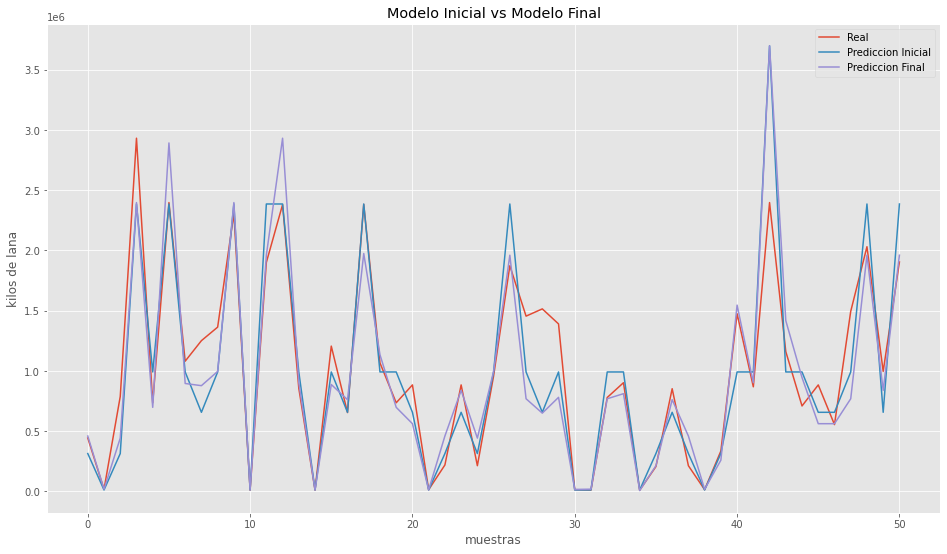

In [36]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(predicciones)),predicciones,label="Prediccion Inicial")
plt.plot(range(len(predicciones_final)),predicciones_final,label="Prediccion Final")
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
plt.xlabel('muestras')
plt.ylabel('kilos de lana')
plt.title("Modelo Inicial vs Modelo Final")
plt.legend()
plt.show()

Al observar el gráfico, podemos notar que la línea roja que representa los valores reales y la línea azul que representa la predicción del modelo inicial tienen una tendencia similar, aunque hay algunas desviaciones. Esto también se aplica al modelo final representado por la línea lila. Esta similitud sugiere que los modelos no están sobreajustando los datos de entrenamiento y es más probable que tengan un mejor desempeño al predecir valores para nuevos datos.